In [7]:
!pip install geopy

In [8]:
import geopy

In [9]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd

# Load the newly created product dataset
product_df = pd.read_csv('final_project_Dataset.csv')

# Check the first few rows
print(product_df.head())


   index                           Uniq Id            Crawl Timestamp  \
0      0  eb49cc038190f6f03c272f79fbbce894  2019-10-30 11:38:11 +0000   
1      1  1657cc30c438affede6a5060d6847363  2019-10-31 15:46:54 +0000   
2      2  41654633cce38c8650690f6dbac01fd3  2019-10-30 09:53:23 +0000   
3      3  08b1bd85c3efc2d7aa556fd79b073382  2019-10-29 16:16:52 +0000   
4      4  3ac3f213732512d1d11bb73ab3b1900f  2019-10-31 09:32:06 +0000   

                                       Product Title  \
0   Lee posh Lactic Acid 60% Anti ageing Pigmenta...   
1   Branded SLB Works New 1.5mm Titanium 1200 nee...   
2   Generic 1 Pc brand snail eye cream remove dar...   
3   Generic Anti Snoring Snore Stopper Sleep Apne...   
4   Harveys Crunchy & Creame Gourmet Delicacies C...   

                                 Product Description      Brand  \
0  PROFESSIONAL GRADE Face Peel: this peel stimul...   Lee Posh   
1  Item name: 1.5mm titanium 1200 needles microne...  SLB Works   
2  Use: eye, item type:

In [12]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [13]:
# Create feature set using product features, location, and synthetic interactions
X_train = product_df[['latitude', 'longitude', 'Price', 'Category_Skin Care', 'total_user_interactions']]

# Optionally, normalize your features if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Target variable: whether or not the product was interacted with (binary classification)
y_train = (product_df['total_user_interactions'] > 0).astype(int)  # 1 if interacted, else 0

# Print final dataset shape and a few rows to check
print(X_train_scaled.shape)
print(y_train.value_counts())


(30000, 5)
total_user_interactions
1    30000
Name: count, dtype: int64


### Model Building
Model Building using CNN-RNN Hybrid

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, LSTM, Reshape, Concatenate
from tensorflow.keras.models import Model, Sequential

In [2]:
# Define the input for product images
image_input = Input(shape=(64, 64, 3), name='image_input')


In [3]:
# Assume your user_interactions is a sequence of 3-digit numbers
# Example: 10 time steps, 3 features (3-digit numbers for each interaction)
user_interactions = np.random.randint(100, 1000, (batch_size, time_steps, 3))

NameError: name 'batch_size' is not defined

In [4]:
# CNN layers for product image
x = Conv2D(32, (3, 3), activation='relu')(image_input)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)

In [5]:
# Define the input for user interactions with the correct shape
interaction_input = Input(shape=(7,), name='interaction_input')  # Updated to 7 features


In [6]:
# Process user interactions through a Dense layer
y = Dense(64, activation='relu')(interaction_input)

In [7]:
# Combine CNN and interaction branches
combined = Concatenate()([x, y])


In [8]:
# Reshape the combined output to fit the LSTM layer input requirements
combined_reshaped = Reshape((2, 64))(combined)

In [9]:
# LSTM for sequential data
lstm_out = LSTM(64)(combined_reshaped)

In [10]:
# Output layer (you can adjust the output size as per your requirement)
output = Dense(1, activation='linear')(lstm_out)

In [11]:
# Build the model
model = Model(inputs=[image_input, interaction_input], outputs=output)

In [12]:
# Create the model with two inputs and one output
model = Model(inputs=[image_input, interaction_input], outputs=output)


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [14]:
# Display the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)      │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 62, 62, 32)        │             896 │ image_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 60, 60, 64)        │          18,496 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 230400)            │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ interaction_input             │ (None, 7)                 │               0 │ -                          │
│ (InputLayer)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 64)                │      14,745,664 │ flatten[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 64)                │             512 │ interaction_input[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 128)               │               0 │ dense[0][0], dense_1[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape (Reshape)             │ (None, 2, 64)             │               0 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm (LSTM)                   │ (None, 64)                │          33,024 │ reshape[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1)                 │              65 │ lstm[0][0]                 │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 14,798,657 (56.45 MB)

 Trainable params: 14,798,657 (56.45 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Save the trained model
model.save('location_recommendation_model.keras')

### training and prediction


In [126]:
# Assuming product_images is a NumPy array of shape (num_samples, 64, 64, 3)
# And user_interactions is a NumPy array of shape (num_samples, 64)
# labels is the array of target labels for training

# Train the model with the two inputs
model.fit(
    [product_images, user_interactions],  # Pass the inputs as a list
    labels,                               # Target labels
    epochs=10,
    batch_size=16
)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 10, 64
'y' sizes: 100


In [127]:
print(product_images.shape)  # Should be (num_samples, 64, 64, 3)
print(user_interactions.shape)  # Should be (num_samples, 64)


(10, 64, 64, 3)
(64, 1, 3)


In [86]:
import numpy as np

# Example product image data, shaped (64, 64, 3)
product_image = np.random.rand(64, 64, 3)  # Replace with actual image data

# Example user interaction data, shaped (64,)
user_interaction = np.random.rand(64)  # Replace with actual interaction data


In [87]:
# Reshape product image and user interaction data to match the input shape of the model
product_image = np.expand_dims(product_image, axis=0)  # Shape: (1, 64, 64, 3)
user_interaction = np.expand_dims(user_interaction, axis=0)  # Shape: (1, 64)


In [88]:
# Make prediction using the model
recommendation_score = model.predict([product_image, user_interaction])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


In [89]:
# Output the recommendation score (you can adjust thresholds for a positive recommendation)
print(f'Recommendation Score: {recommendation_score}')

Recommendation Score: [[0.0453361]]


In [90]:
if recommendation_score > 0.5:
    print("Recommend the product to the user")
else:
    print("Do not recommend the product")


Do not recommend the product


In [91]:
# Example product list, assuming you have a batch of product images and interactions
product_images = np.random.rand(10, 64, 64, 3)  # 10 sample product images
user_interactions = np.random.rand(10, 64)  # 10 user interactions

# Predict recommendations for the batch
recommendation_scores = model.predict([product_images, user_interactions])

# Print recommendations for the top N products
top_N = 5
recommended_indices = np.argsort(recommendation_scores)[-top_N:]

for idx in recommended_indices:
    print(f"Recommend product {idx} with score {recommendation_scores[idx]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
Recommend product [0] with score [[0.08379593]]
Recommend product [0] with score [[0.08379593]]
Recommend product [0] with score [[0.08379593]]
Recommend product [0] with score [[0.08379593]]
Recommend product [0] with score [[0.08379593]]


## recommendation using dataset

In [16]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('location_recommendation_model.keras')


C:\Users\ASUS\tvenv\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 28 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the processed dataset (replace with the actual path to your file)
df = pd.read_csv('final_project_Dataset.csv')


In [18]:
# Prepare interaction data (selecting relevant features)
interaction_features = ['distance_to_user', 'discount_percentage'] + [col for col in df.columns if 'Category_' in col]
X_interactions = df[interaction_features].fillna(0).values  # Fill NaN with 0 or appropriate value


In [19]:
# Ensure all data is numeric
X_interactions = X_interactions.astype(float)



In [20]:
# Normalize or Standardize the data if necessary
#scaler = StandardScaler()
#X_interactions = scaler.fit_transform(X_interactions)

In [21]:
# Target variable
y = df['total_user_interactions'].values.astype(float)  # Ensure the target is also float


In [22]:
# Generate dummy image data
dummy_image_input = np.zeros((X_interactions.shape[0], 64, 64, 3))  # Same number of samples as X_interactions



In [23]:
# Split the data consistently for both image and interaction inputs
X_interactions_train, X_interactions_test, y_train, y_test, X_image_train, X_image_test = train_test_split(
    X_interactions, y, dummy_image_input, test_size=0.2, random_state=42)


In [24]:
from sklearn.preprocessing import StandardScaler

# Scaling interaction data
scaler = StandardScaler()
X_interactions = scaler.fit_transform(X_interactions)

# Scaling target variable (if it's not binary classification)
y = scaler.fit_transform(y.reshape(-1, 1)).flatten()


In [25]:
history = model.fit(
    [X_image_train, X_interactions_train],  # Inputs
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=([X_image_test, X_interactions_test], y_test)  # Validation data
)



Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 128s 166ms/step - loss: 234739.3594 - mae: 484.0880 - val_loss: 198253.0312 - val_mae: 444.9823
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 127s 169ms/step - loss: 187763.8281 - mae: 432.9035 - val_loss: 158974.7500 - val_mae: 398.4100
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 124s 166ms/step - loss: 150261.3906 - mae: 387.1920 - val_loss: 126287.2031 - val_mae: 355.0262
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 143s 167ms/step - loss: 119012.9922 - mae: 344.4937 - val_loss: 98667.6484 - val_mae: 313.7256
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 125s 167ms/step - loss: 92406.6328 - mae: 303.4472 - val_loss: 75322.5938 - val_mae: 274.0057
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 125s 167ms/step - loss: 69983.2266 - mae: 263.9499 - val_loss: 55778.6094 - val_mae: 235.6589
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 126s 167ms/step - loss: 51425.8516 - mae: 226.0718 - val_loss: 39717.9531 - val_mae: 198.6812
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 126s 168ms/step

In [26]:
# Evaluate the model
model.evaluate([X_image_test, X_interactions_test], y_test)  # Provide both inputs for evaluation

188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 9853.0605 - mae: 98.0242


[9850.822265625, 98.0162582397461]

In [27]:
import numpy as np

# Sample data preparation

# Example: Dummy image data for new inputs (64x64 images with 3 color channels)
# Here, we're creating a batch of 5 new samples as an example
X_image_new = np.random.rand(5, 64, 64, 3)  # Replace with actual image data

# Example: Dummy interaction data for new inputs
# Let's say your interaction input has 7 features
X_interactions_new = np.random.rand(5, 7)  # Replace with actual interaction data


In [28]:
# Make predictions using the trained model
predicted_scores = model.predict([X_image_new, X_interactions_new])

# Print the predicted scores for these new inputs
print("Predicted interaction scores:", predicted_scores)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
Predicted interaction scores: [[402.15927]
 [402.18362]
 [402.1789 ]
 [402.15683]
 [402.15253]]


In [29]:
# Optionally, get the indices of the top-N recommendations
N = 3  # Number of recommendations
top_n_indices = np.argsort(predicted_scores.flatten())[-N:]

# Assuming you have a list of products or items
# Here's a dummy list of product IDs corresponding to the new input data
product_ids = ["Product1", "Product2", "Product3", "Product4", "Product5"]

# Get the recommended products based on the top predicted scores
recommended_products = [product_ids[idx] for idx in top_n_indices]

print("Recommended products:", recommended_products)

Recommended products: ['Product1', 'Product3', 'Product2']


### use the above code 

### Updated Preprocessing Code Without Images


In [26]:
import pandas as pd

# Load the dataset
df = pd.read_csv('final_project_Dataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Display summary information about the dataset
print(df.info())


   index                           Uniq Id            Crawl Timestamp  \
0      0  eb49cc038190f6f03c272f79fbbce894  2019-10-30 11:38:11 +0000   
1      1  1657cc30c438affede6a5060d6847363  2019-10-31 15:46:54 +0000   
2      2  41654633cce38c8650690f6dbac01fd3  2019-10-30 09:53:23 +0000   
3      3  08b1bd85c3efc2d7aa556fd79b073382  2019-10-29 16:16:52 +0000   
4      4  3ac3f213732512d1d11bb73ab3b1900f  2019-10-31 09:32:06 +0000   

                                       Product Title  \
0   Lee posh Lactic Acid 60% Anti ageing Pigmenta...   
1   Branded SLB Works New 1.5mm Titanium 1200 nee...   
2   Generic 1 Pc brand snail eye cream remove dar...   
3   Generic Anti Snoring Snore Stopper Sleep Apne...   
4   Harveys Crunchy & Creame Gourmet Delicacies C...   

                                 Product Description      Brand  \
0  PROFESSIONAL GRADE Face Peel: this peel stimul...   Lee Posh   
1  Item name: 1.5mm titanium 1200 needles microne...  SLB Works   
2  Use: eye, item type:

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [28]:
# Load the dataset
df = pd.read_csv('final_project_Dataset.csv')

In [29]:
# Step 1: Handle Missing Values (same as before)
df['Product Description'].fillna('', inplace=True)
df['Brand'].fillna('Unknown', inplace=True)
df['Mrp'].fillna(df['Mrp'].median(), inplace=True)
df['Price'].fillna(df['Price'].median(), inplace=True)
df['discount_percentage'].fillna(0, inplace=True)
df.dropna(subset=['Pack Size Or Quantity'], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23904\290592254.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product Description'].fillna('', inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_23904\290592254.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [30]:
class SafeLabelEncoder(LabelEncoder):
    def fit(self, X):
        # Fit the label encoder as usual
        super().fit(X)
        # Add 'unknown' to the classes
        if 'unknown' not in self.classes_:
            self.classes_ = np.append(self.classes_, 'unknown')
        return self

    def transform(self, X):
        X = np.array(X)
        # Assign 'unknown' to any labels not seen during fitting
        unknown_mask = np.isin(X, self.classes_, invert=True)
        X[unknown_mask] = 'unknown'
        return super().transform(X)

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

In [31]:
# Step 2: Encode Categorical Variables
# Encoding 'Brand', 'Site Name', and 'city'
label_encoders = {}
for column in ['Brand', 'Site Name', 'city']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
pip install pillow


In [32]:
# Step 3: Normalize Numerical Data
scaler = MinMaxScaler()

In [33]:
# Normalize 'Mrp', 'Price', 'discount_percentage', 'latitude', 'longitude', and 'distance_to_user'
df[['Mrp', 'Price', 'discount_percentage', 'latitude', 'longitude', 'distance_to_user']] = scaler.fit_transform(
    df[['Mrp', 'Price', 'discount_percentage', 'latitude', 'longitude', 'distance_to_user']]
)


In [34]:
# Step 4: Prepare Data for Model Input
# Here, we'll combine relevant features into user_interactions.
time_steps = 1  # Assuming a single timestep (you can modify this if needed)
user_interactions = df[['Brand', 'Price', 'total_user_interactions', 'latitude', 'longitude', 'distance_to_user']].values.reshape(-1, time_steps, 6)


In [35]:
# Example: Using a binary category as labels (modify this as per your target variable)
labels = df['Category_Detergents & Dishwash'].values  # Replace with the appropriate target if needed

# user_interactions is now ready to be used as input to your model.

### Model Training Without Images

In [37]:
# Example model (same as before but without image input)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input

In [38]:
# Define input shapes
batch_size = 64
time_steps = 1  # Adjust if using sequences
input_shape = (time_steps, 6)

In [39]:
# Input for user_interactions
interaction_input = Input(shape=input_shape)

In [40]:
# LSTM Layer
lstm = LSTM(128, return_sequences=False)(interaction_input)
output = Dense(1, activation='sigmoid')(lstm)

In [41]:
# Build the model
model = Model(inputs=interaction_input, outputs=output)

In [42]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
# Train the model with reduced epochs
model.fit(user_interactions, labels, epochs=5, batch_size=batch_size, validation_split=0.2)


Epoch 1/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8201 - loss: 0.3119 - val_accuracy: 0.9956 - val_loss: 0.0294
Epoch 2/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9976 - loss: 0.0192 - val_accuracy: 0.9956 - val_loss: 0.0280
Epoch 3/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9968 - loss: 0.0213 - val_accuracy: 0.9956 - val_loss: 0.0280
Epoch 4/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9967 - loss: 0.0219 - val_accuracy: 0.9956 - val_loss: 0.0282
Epoch 5/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9981 - loss: 0.0142 - val_accuracy: 0.9956 - val_loss: 0.0283


In [44]:
# Train the model with reduced epochs
model.fit(user_interactions, labels, epochs=10, batch_size=batch_size, validation_split=0.2)


Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9975 - loss: 0.0172 - val_accuracy: 0.9956 - val_loss: 0.0283
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9972 - loss: 0.0191 - val_accuracy: 0.9956 - val_loss: 0.0278
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9986 - loss: 0.0109 - val_accuracy: 0.9956 - val_loss: 0.0279
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9970 - loss: 0.0199 - val_accuracy: 0.9956 - val_loss: 0.0276
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9980 - loss: 0.0139 - val_accuracy: 0.9956 - val_loss: 0.0277
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9968 - loss: 0.0210 - val_accuracy: 0.9956 - val_loss: 0.0277
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9974 - loss: 0.0176 - val_accuracy: 0.9956 - val_loss: 0.0278
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9980 - loss: 0.0140 - val_accuracy: 0.

In [45]:
# Save the trained model
model.save('location_recommendation_model.keras')


In [46]:
# Evaluate the model
loss, accuracy = model.evaluate(user_interactions, labels, batch_size=batch_size)

# Print the evaluation results
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0147
Test Loss: 0.0194
Test Accuracy: 0.9971


In [47]:
# Make predictions on the test data
predictions = model.predict(user_interactions, batch_size=batch_size)

# Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
predicted_labels = (predictions > 0.5).astype(int)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [48]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute the confusion matrix
conf_matrix = confusion_matrix(labels, predicted_labels)

# Print the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)

# Optionally, print a classification report for more detailed metrics
print('\nClassification Report:')
print(classification_report(labels, predicted_labels))


Confusion Matrix:
[[10194     0]
 [   30     0]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10194
        True       0.00      0.00      0.00        30

    accuracy                           1.00     10224
   macro avg       0.50      0.50      0.50     10224
weighted avg       0.99      1.00      1.00     10224



C:\Users\ASUS\tvenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\tvenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\tvenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
# Train the model and save the history
history = model.fit(user_interactions, labels, epochs=10, batch_size=batch_size, validation_split=0.2)


Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9985 - loss: 0.0113 - val_accuracy: 0.9956 - val_loss: 0.0281
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9980 - loss: 0.0144 - val_accuracy: 0.9956 - val_loss: 0.0278
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9960 - loss: 0.0257 - val_accuracy: 0.9956 - val_loss: 0.0275
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9974 - loss: 0.0175 - val_accuracy: 0.9956 - val_loss: 0.0278
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9986 - loss: 0.0106 - val_accuracy: 0.9956 - val_loss: 0.0276
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9981 - loss: 0.0135 - val_accuracy: 0.9956 - val_loss: 0.0279
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9976 - loss: 0.0168 - val_accuracy: 0.9956 - val_loss: 0.0279
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9967 - loss: 0.0213 - val_accuracy: 0.

In [ ]:
pip install matplotlib


In [50]:
import matplotlib.pyplot as plt


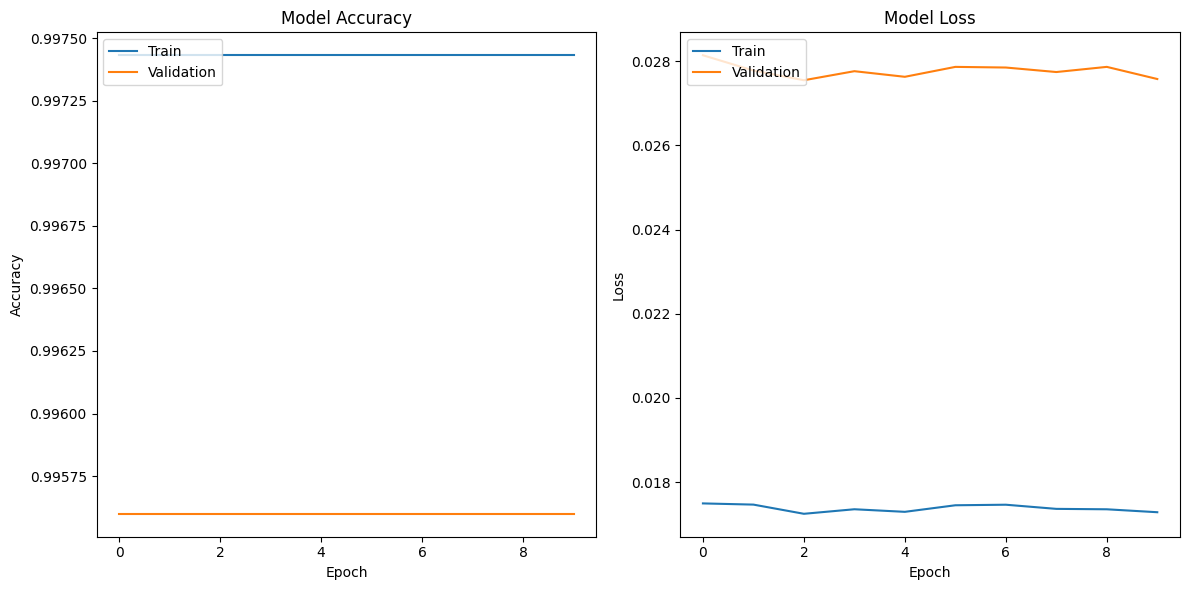

In [51]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show the plots
plt.tight_layout()
plt.show()

### loading the model for recommendation

In [53]:
from tensorflow.keras.models import load_model

# Load the previously saved model
model = load_model('location_recommendation_model.keras')


In [54]:
# Assuming you have product_images and user_interactions as the input data
product_images = np.random.rand(100, 64, 64, 3)  # Replace with actual image data
user_interactions = np.random.rand(100, 64)  # Replace with actual interaction data
labels = np.random.randint(0, 2, size=(100,))  # Replace with actual labels


In [56]:
print(product_images.shape)        # Should be (num_samples, 64, 64, 3)
print(user_interactions.shape)     # Should be (num_samples, 64)


(100, 64, 64, 3)
(100, 64)


In [60]:
# Assuming product_images is a NumPy array of shape (num_samples, 64, 64, 3)
# And user_interactions is a NumPy array of shape (num_samples, 64)
# labels is the array of target labels for training

# Train the model with the two inputs
model.fit(
    [product_images, user_interactions],  # Pass the inputs as a list
    labels,                               # Target labels
    epochs=10,
    batch_size=16
)


Epoch 1/10


ValueError: Layer "functional_1" expects 1 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'data:0' shape=(None, 64, 64, 3) dtype=float32>, <tf.Tensor 'data_1:0' shape=(None, 64) dtype=float32>]